# Scheduler


As mentioned in diffusers documents, selecting "a more efficient scheduler could help decrease the number of steps without sacrificing output quality". See schedulers which are compatible with the your model: 

In [26]:
from diffusers import DiffusionPipeline, StableDiffusionPipeline
import torch
from IPython.display import display
from diffusers.utils import make_image_grid


pipeline = StableDiffusionPipeline.from_pretrained(pretrained_model_name_or_path = "./models/finetuned/Ellar_Coltrane",
                                               torch_dtype=torch.float16,
                                               safety_checker=None,
                                               use_safetensors=True)

# 
pipeline.scheduler.compatibles

Loading pipeline components...: 100%|█████████████| 6/6 [00:01<00:00,  5.72it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


[diffusers.utils.dummy_torch_and_scipy_objects.LMSDiscreteScheduler,
 diffusers.schedulers.scheduling_unipc_multistep.UniPCMultistepScheduler,
 diffusers.schedulers.scheduling_deis_multistep.DEISMultistepScheduler,
 diffusers.schedulers.scheduling_ddim.DDIMScheduler,
 diffusers.schedulers.scheduling_pndm.PNDMScheduler,
 diffusers.schedulers.scheduling_euler_ancestral_discrete.EulerAncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_heun_discrete.HeunDiscreteScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_ancestral_discrete.KDPM2AncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_edm_euler.EDMEulerScheduler,
 diffusers.schedulers.scheduling_ddpm.DDPMScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_discrete.KDPM2DiscreteScheduler,
 diffusers.schedulers.scheduling_dpmsolver_multistep.DPMSolverMultistepScheduler,
 diffusers.schedulers.scheduling_euler_discrete.EulerDiscreteScheduler,
 diffusers.schedulers.scheduling_dpmsolver_singlestep.DPMSolverSinglestepScheduler

Loading pipeline components...: 100%|████████████████████████| 6/6 [00:17<00:00,  2.89s/it]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
100%|████████████████████████████████████████████████████| 100/100 [01:13<00:00,  1.36it/s]


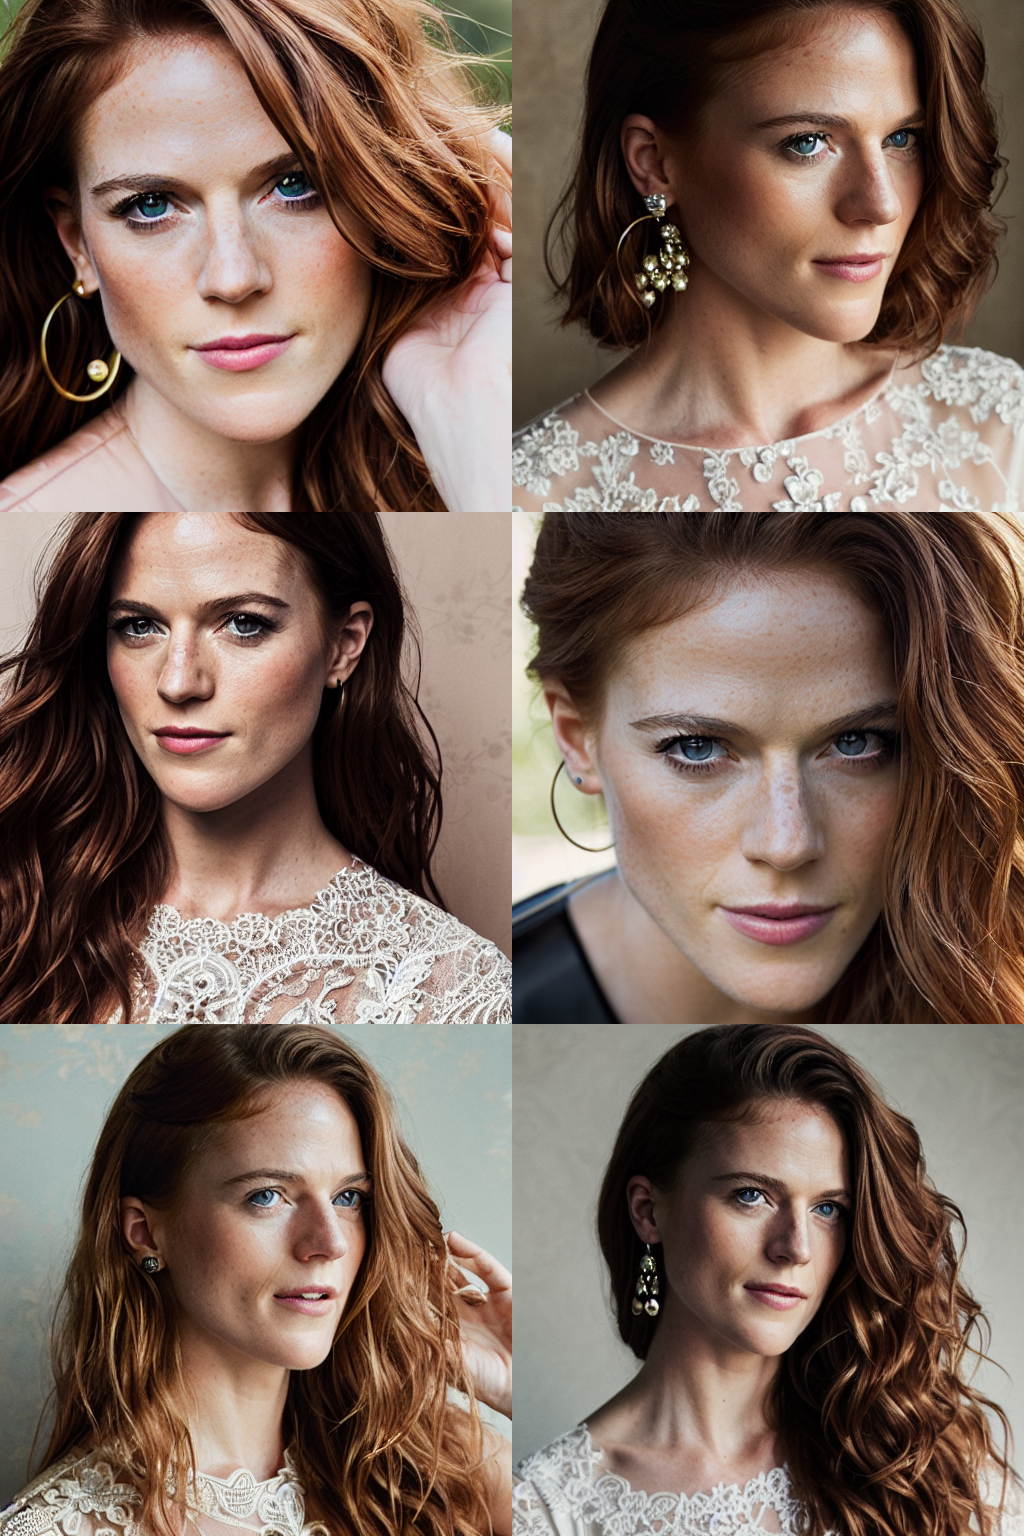

In [15]:
from diffusers import DiffusionPipeline, StableDiffusionPipeline
from diffusers import DPMSolverMultistepScheduler
import torch
from IPython.display import display
from diffusers.utils import make_image_grid
from datetime import datetime


character = "Rose_Leslie"

pipe = StableDiffusionPipeline.from_pretrained(pretrained_model_name_or_path = "./models/finetuned/" + character,
                                               torch_dtype=torch.float16,
                                               safety_checker=None,
                                               use_safetensors=True)

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")
pipe.enable_attention_slicing()

# generator = torch.Generator(device="cuda").manual_seed(1345)


prompt = "a realistic portrait of sks woman"
negative_prompt = ""

# To avoid bad face
prompt += ", high detailed skin"
negative_prompt += ", poorly Rendered face, poorly drawn face, poor facial details"

# To avoid deformed and bad eyes
prompt += ", beautiful hazel eyes, highly detailed eyes, realistic eyes, thin eyebrows,"
negative_prompt += ", ugly eyes, imperfect eyes, deformed pupils, deformed iris,"


# To avoid bad quality of image
prompt += ", studio lighting, dslr, ultra quality, sharp focus, tack sharp, dof, film grain, Fujifilm XT3, crystal clear, 8K UHD"
negative_prompt += ", low resolution, Images cut out at the top, left, right, bottom., bad composition, blurry image, disfigured, oversaturated"



def get_inputs(batch_size=1):
    generator = [torch.Generator("cuda").manual_seed(i) for i in range(batch_size)]
    prompts = batch_size * [prompt]
    negative_prompts = batch_size * [negative_prompt]
    num_inference_steps = 100
    return {"prompt": prompts, "negative_prompt": negative_prompts, "generator": generator, "num_inference_steps": num_inference_steps}


images = pipe(**get_inputs(batch_size=6)).images

make_image_grid(images, 3, 2)

# for image in images:
#     display(image)

In [16]:

now = datetime.now()
date_time = now.strftime("%m%d%Y, %H%M%S")

for index, image in enumerate(images):
    image.save("images/" + character + "/fake/" + date_time + "_" + str(index) + ".jpg") 

In [ ]:
!pip install opencv-python


In [ ]:
import cv2

In [ ]:
from PIL import Image
import os
p = "./instance_images/Ellar_Coltrane"
files = os.listdir(p)
for i, f in enumerate(files):
    pp = os.path.join(p, f)
    im = Image.open(pp)
    rgb_im = im.convert('RGB')
    rgb_im.save(os.path.join(p, str(i)+ '.jpeg'))